In [81]:
import numpy as np
import scipy.linalg as la
import asymmetric as asym
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import glob

# Naive

In [52]:
L = 11
# Total time elapsed
end = 3
# Time steps per second
n = 20

weightfore9, weightback9 = asym.get_all_weights(L, end, n, here=False, dense = True)

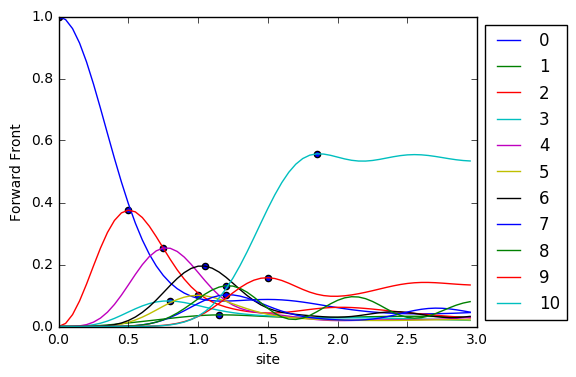

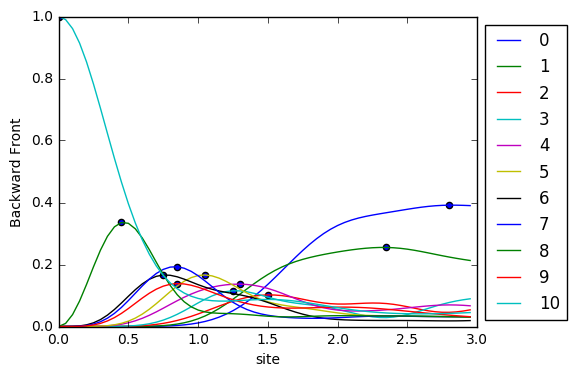

In [56]:
end = (int) (n*3)
peaks = np.zeros((2,L))

ax = plt.subplot(111)
for i in range(L):
    for jdx, val in enumerate(weightfore9[i]):
        if (val > weightfore9[i,jdx+1]): peaks[0,i] = jdx; break
    peaks[0,0]=0
    if (i%1==0): 
        ax.plot(np.arange(end)/n,weightfore9[i,:end], label = str(i))
        ax.scatter(peaks[0,i]/n, weightfore9[i, (int)(peaks[0,i])])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1, 1), loc=2)
plt.ylim(0,1)
plt.xlim(0,3)
plt.ylabel('Forward Front')
plt.xlabel('site')
plt.show()

ax = plt.subplot(111)
for i in range(L):
    for jdx, val in enumerate(weightback9[i]):
        if (val > weightback9[i,jdx+1]): 
            peaks[1,i] = jdx
            break
    peaks[1,L-1]=0
    if (i%1==0): 
        ax.plot(np.arange(end)/n,weightback9[i,:end], label = str(i))
        ax.scatter(peaks[1,i]/n, weightback9[i, (int)(peaks[1,i])])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1, 1), loc=2)
plt.ylim(0,1)
plt.xlim(0,3)
plt.ylabel('Backward Front')
plt.xlabel('site')
plt.show()

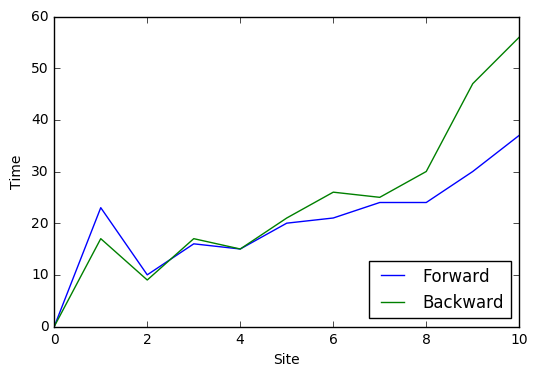

In [55]:
plt.plot(range(L),peaks[0], label="Forward")
plt.plot(range(L),peaks[1][::-1], label="Backward")
plt.ylabel('Time')
plt.xlabel('Site')
plt.legend(loc=4)
plt.savefig('figures/peaks_no_disorder.pdf')
plt.show()

# Averaging
### Without disorder

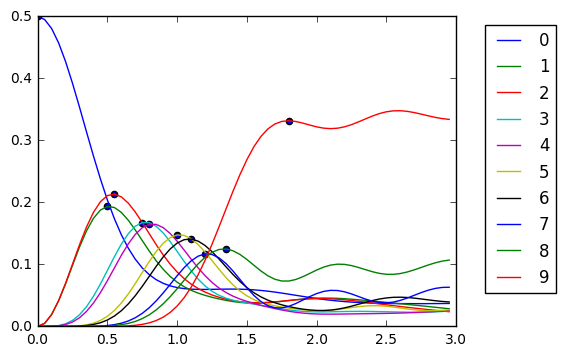

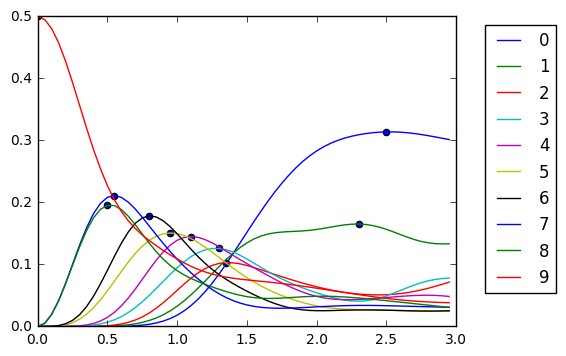

In [35]:
end = (int) (n*3)
peaks = np.zeros((2,L-1))

ax = plt.subplot(111)
for i in range(L-1):
    data = (weightfore9[i]+weightfore9[i+1])/2
    for jdx, val in enumerate(data):
        if (val > data[jdx+1]): peaks[0,i] = jdx; break
    if (i%1==0): 
        ax.plot(np.arange(end)/n,data[:end], label = str(i))
        ax.scatter(peaks[0,i]/n, data[(int)(peaks[0,i])])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,.5)
plt.xlim(0,3)
plt.show()

ax = plt.subplot(111)
for i in range(L-1):
    data = (weightback9[i]+weightback9[i+1])/2
    for jdx, val in enumerate(data):
        if (val > data[jdx+1]): 
            peaks[1,i] = jdx
            break
    if (i%1==0): 
        ax.plot(np.arange(end)/n,data[:end], label = str(i))
        ax.scatter(peaks[1,i]/n, data[(int)(peaks[1,i])])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,.5)
plt.xlim(0,3)
plt.show()

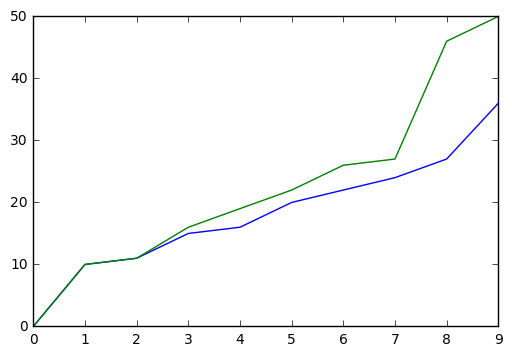

In [36]:
plt.plot(range(L-1),peaks[0])
plt.plot(range(L-1),peaks[1,::-1])

### With Disorder

In [71]:
L = 9; end = 3; n = 20

weightfore9, weightback9 = asym.get_all_weights(L, end, n, here=False, dense = True, field_strength=1)

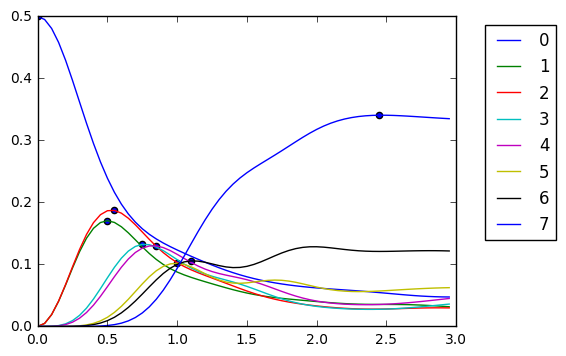

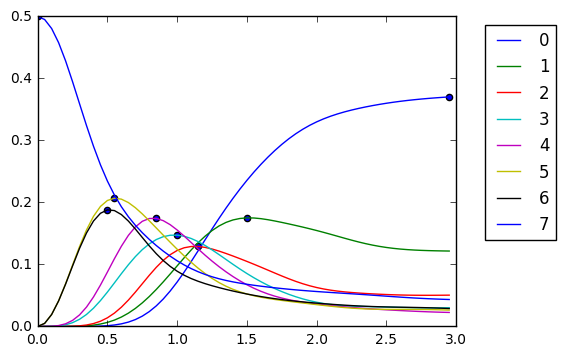

In [77]:
end = (int) (n*3)
peaks = np.zeros((2,L-1))

ax = plt.subplot(111)
for i in range(L-1):
    data = (weightfore9[i]+weightfore9[i+1])/2
    for jdx, val in enumerate(data):
        if (val > data[jdx+1]): peaks[0,i] = jdx; break
    if (i%1==0): 
        ax.plot(np.arange(end)/n,data[:end], label = str(i))
        ax.scatter(peaks[0,i]/n, data[(int)(peaks[0,i])])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,.5)
plt.xlim(0,3)
plt.show()

ax = plt.subplot(111)
for i in range(L-1):
    data = (weightback9[i]+weightback9[i+1])/2
    for jdx, val in enumerate(data):
        if (val > data[jdx+1]): 
            peaks[1,i] = jdx
            break
        if (jdx == 58): peaks[1,i] = 59; break
    if (i%1==0): 
        ax.plot(np.arange(end)/n,data[:end], label = str(i))
        ax.scatter(peaks[1,i]/n, data[(int)(peaks[1,i])])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,.5)
plt.xlim(0,3)
plt.show()

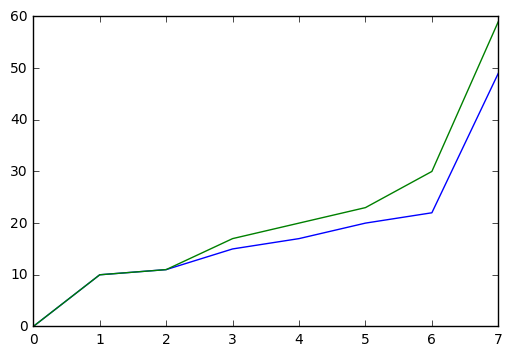

In [78]:
plt.plot(range(L-1),peaks[0])
plt.plot(range(L-1),peaks[1,::-1])

# $A_0+A_1$

In [68]:
L = 9
# Total time elapsed
end = 3
# Time steps per second
n = 20

weightfore9, weightback9 = asym.get_all_weights(L, end, n, here=False, dense = True, Azero=False, Aplus=True, 
                                                field_strength=0)

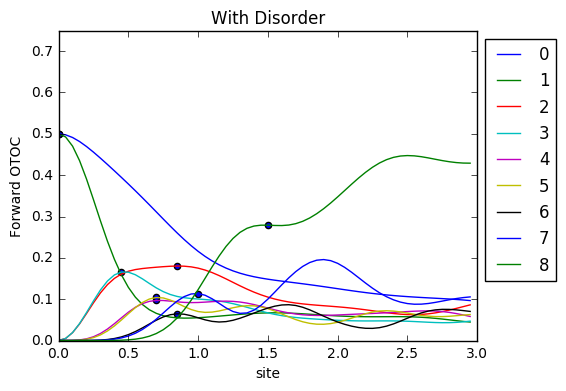

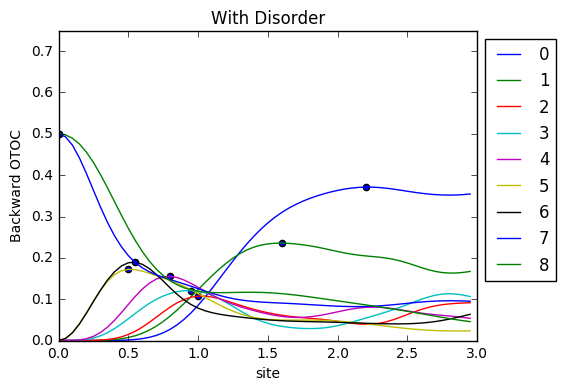

In [69]:
end = (int) (n*3)
peaks = np.zeros((2,L))

ax = plt.subplot(111)
for i in range(L):
    for jdx, val in enumerate(weightfore9[i]):
        if (val > weightfore9[i,jdx+1] or jdx==58): peaks[0,i] = jdx; break
    peaks[0,0]=0
    if (i%1==0): 
        ax.plot(np.arange(end)/n,weightfore9[i,:end], label = str(i))
        ax.scatter(peaks[0,i]/n, weightfore9[i, (int)(peaks[0,i])])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1, 1), loc=2)
plt.ylim(0,.75)
plt.xlim(0,3)
plt.ylabel('Forward OTOC')
plt.xlabel('site')
plt.title('With Disorder')
plt.savefig('figures/plusOTOCwDisorder_fore.pdf')
plt.show()

ax = plt.subplot(111)
for i in range(L):
    for jdx, val in enumerate(weightback9[i]):
        if (val > weightback9[i,jdx+1] or jdx==58): 
            peaks[1,i] = jdx
            break
    peaks[1,L-1]=0
    if (i%1==0): 
        ax.plot(np.arange(end)/n,weightback9[i,:end], label = str(i))
        ax.scatter(peaks[1,i]/n, weightback9[i, (int)(peaks[1,i])])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1, 1), loc=2)
plt.ylim(0,.75)
plt.xlim(0,3)
plt.ylabel('Backward OTOC')
plt.xlabel('site')
plt.title('With Disorder')
plt.savefig('figures/plusOTOCwDisorder_back.pdf')
plt.show()

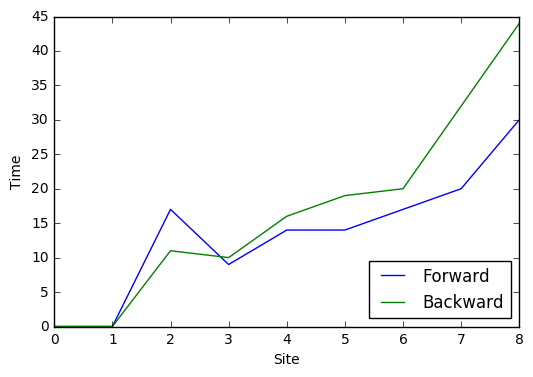

In [70]:
plt.plot(range(L),peaks[0], label="Forward")
plt.plot(range(L),peaks[1][::-1], label="Backward")
plt.ylabel('Time')
plt.xlabel('Site')
plt.legend(loc=4)
plt.savefig('figures/plusPeakssDisorder')
plt.show()

# Read from file

In [87]:
runs = 4
L = 9
end = 3
n = 20

here = True
pauli = True
Azero = True
Aplus = False
Amult = False
field_strength = 1
dot_strength = 0

prefix = "data/weights_L"+str(L)+"end"+str(end)+"n"+str(n)+"_"+str(int(here))+ \
         str(int(pauli))+"_"+str(int(Azero))+str(int(Aplus))+str(int(Amult))+ \
         "_"+str(field_strength)+"_"+str(dot_strength)+"#"
fnames = glob.glob(prefix + "*.npy")

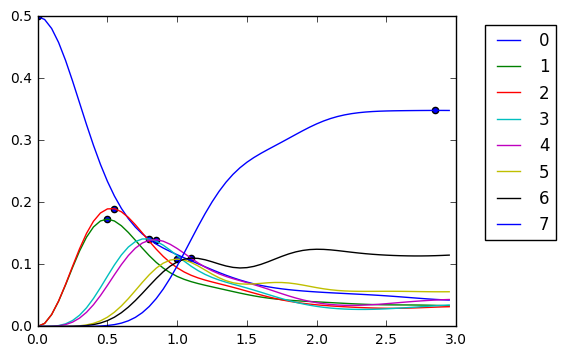

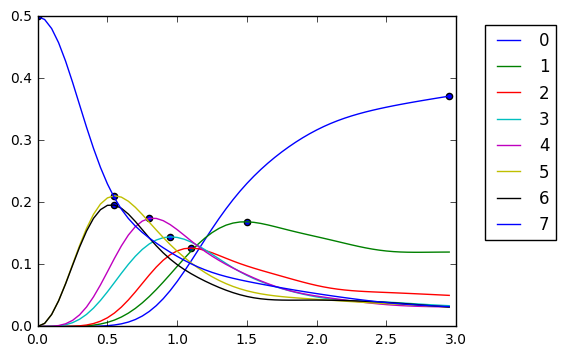

[[  0.  10.  11.  16.  17.  20.  22.  57.]
 [ 59.  30.  22.  19.  16.  11.  11.   0.]]


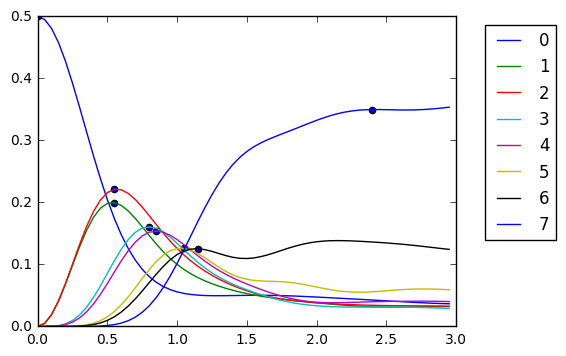

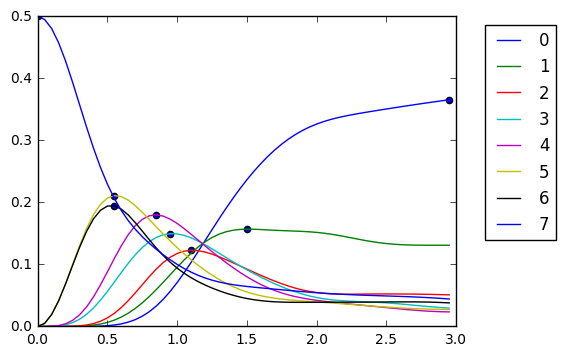

[[  0.  11.  11.  16.  17.  21.  23.  48.]
 [ 59.  30.  22.  19.  17.  11.  11.   0.]]


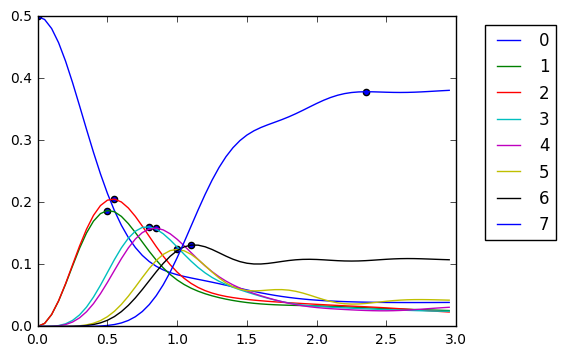

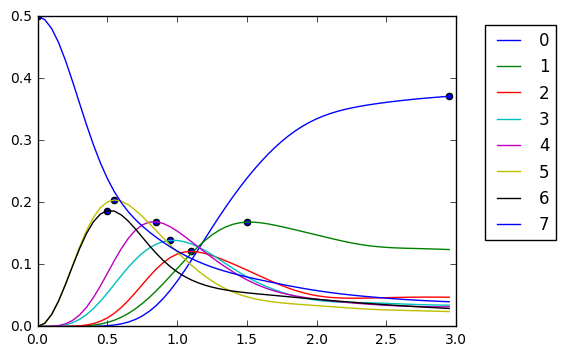

[[  0.  10.  11.  16.  17.  20.  22.  47.]
 [ 59.  30.  22.  19.  17.  11.  10.   0.]]


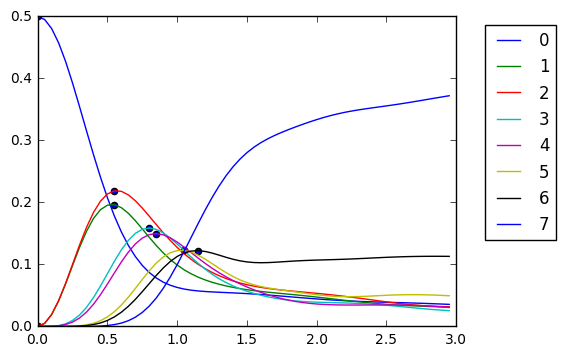

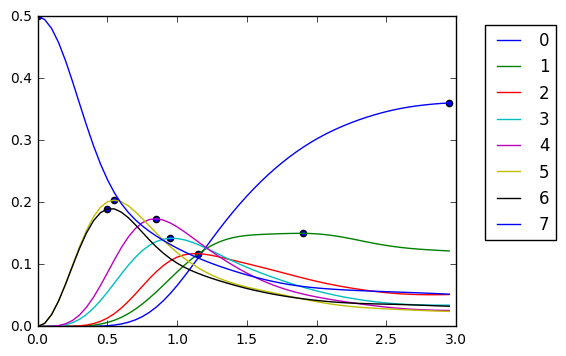

[[  0.  11.  11.  16.  17.  21.  23.   0.]
 [ 59.  38.  23.  19.  17.  11.  10.   0.]]


In [89]:
for fname in fnames:
    _, _, weightfore9, weightback9 = np.load(fname)
    end = (int) (n*3)
    peaks = np.zeros((2,L-1))

    ax = plt.subplot(111)
    for i in range(L-1):
        data = (weightfore9[i]+weightfore9[i+1])/2
        for jdx, val in enumerate(data):
            if (val > data[jdx+1]): peaks[0,i] = jdx; break
            if (jdx == 58): peaks[1,i] = 59; break
        if (i%1==0): 
            ax.plot(np.arange(end)/n,data[:end], label = str(i))
            ax.scatter(peaks[0,i]/n, data[(int)(peaks[0,i])])
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
    plt.ylim(0,.5)
    plt.xlim(0,3)
    plt.show()

    ax = plt.subplot(111)
    for i in range(L-1):
        data = (weightback9[i]+weightback9[i+1])/2
        for jdx, val in enumerate(data):
            if (val > data[jdx+1]): 
                peaks[1,i] = jdx
                break
            if (jdx == 58): peaks[1,i] = 59; break
        if (i%1==0): 
            ax.plot(np.arange(end)/n,data[:end], label = str(i))
            ax.scatter(peaks[1,i]/n, data[(int)(peaks[1,i])])
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
    plt.ylim(0,.5)
    plt.xlim(0,3)
    plt.show()
    print(peaks)